In [99]:
# data manipulation and math
import numpy as np
import pandas as pd

# plotting and visualization
import matplotlib as mpl
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from matplotlib.cm import viridis
from matplotlib.colors import to_rgba
#
import seaborn as sns

Loaded Libraries


In [100]:
#uploading the data
game = pd.read_csv(r"C:\Users\ghaza\OneDrive\Desktop\Projects\Spring board\Capstone 2\Gamestop\archive\gamestop_product_reviews_dataset.csv")

In [101]:
game.head(3)

,url,name,brand,sku,reviewer_name,review_title,review_description,recommended_review,verifed_purchaser,helpful_count,not_helpful_count,reviewed_at,images,rating,average_rating,reviews_count,reviews_link,comment_id,uniq_id,scraped_at
0,https://www.gamestop.com/electronics/tvs-monit...,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,VIZIO,328244,Leeford,NaN,My new OLED is a upgrade and it's great! This...,yes: I recommend this product,NaN,0,0,10 months ago,NaN,5.0,4.2727,363,https://www.gamestop.com/on/demandware.store/S...,229196240,d749678d-aeba-5a6b-b8e2-8d2121463672,16/01/2022 16:17:56
1,https://www.gamestop.com/electronics/tvs-monit...,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,VIZIO,328244,DJM7,Great looking screen!,Rating is really a 4.5 but that's unavailable....,yes: I recommend this product,NaN,0,0,10 months ago,NaN,4.0,4.2727,363,https://www.gamestop.com/on/demandware.store/S...,229179703,9f20312c-1047-5824-97d2-d5563b8fd046,16/01/2022 16:17:56
2,https://www.gamestop.com/electronics/tvs-monit...,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,VIZIO,328244,EC82,Quality,I’m quite pleased with the entire product as a...,yes: I recommend this product,NaN,0,0,10 months ago,NaN,4.0,4.2727,363,https://www.gamestop.com/on/demandware.store/S...,229174444,178b3b03-2c56-5abc-a016-c74c2633c9c2,16/01/2022 16:17:56


In [102]:

game['url'].iloc[1]

'https://www.gamestop.com/electronics/tvs-monitors/televisions/products/vizio-55-in-class-oled-4k-hdr-smart-tv-oled55-h1/11180293.html'

In [103]:
print(game.columns)

Index(['url', 'name', 'brand', 'sku', 'reviewer_name', 'review_title',
       'review_description', 'recommended_review', 'verifed_purchaser',
       'helpful_count', 'not_helpful_count', 'reviewed_at', 'images', 'rating',
       'average_rating', 'reviews_count', 'reviews_link', 'comment_id',
       'uniq_id', 'scraped_at'],
      dtype='object')


In [104]:
print('The data have ', game.shape[0], ' rows and ', game.shape[1], ' columns\n')
print('column names: \n')
print('\n'.join(list(game.columns)))

The data have  4686  rows and  20  columns

column names: 

url
name
brand
sku
reviewer_name
review_title
review_description
recommended_review
verifed_purchaser
helpful_count
not_helpful_count
reviewed_at
images
rating
average_rating
reviews_count
reviews_link
comment_id
uniq_id
scraped_at


In [105]:
game.describe()

,sku,helpful_count,not_helpful_count,rating,average_rating,reviews_count,comment_id
count,4686.000000,4686.000000,4686.000000,4686.000000,4686.000000,4686.000000,4.686000e+03
mean,328932.494238,1.132949,0.873026,4.355741,4.408482,557.925523,1.462754e+08
std,246778.746328,3.746508,4.813523,1.124101,0.356394,521.627348,6.564770e+07
min,106427.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.343211e+07
25%,173787.000000,0.000000,0.000000,4.000000,4.272700,136.000000,1.203983e+08
50%,277492.000000,0.000000,0.000000,5.000000,4.422100,424.000000,1.358375e+08
75%,316366.000000,1.000000,0.000000,5.000000,4.615600,643.000000,2.123265e+08
max,954016.000000,103.000000,125.000000,5.000000,5.000000,2390.000000,1.109150e+09


In [106]:
game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4686 entries, 0 to 4685
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   url                 4686 non-null   object 
 1   name                4686 non-null   object 
 2   brand               4686 non-null   object 
 3   sku                 4686 non-null   int64  
 4   reviewer_name       4686 non-null   object 
 5   review_title        4621 non-null   object 
 6   review_description  4686 non-null   object 
 7   recommended_review  4686 non-null   object 
 8   verifed_purchaser   2406 non-null   object 
 9   helpful_count       4686 non-null   int64  
 10  not_helpful_count   4686 non-null   int64  
 11  reviewed_at         4686 non-null   object 
 12  images              166 non-null    object 
 13  rating              4686 non-null   float64
 14  average_rating      4686 non-null   float64
 15  reviews_count       4686 non-null   int64  
 16  review

In [107]:
#check for duplicates in reviewers 
duplicates = game.duplicated(subset='reviewer_name')
game[duplicates].head()

,url,name,brand,sku,reviewer_name,review_title,review_description,recommended_review,verifed_purchaser,helpful_count,not_helpful_count,reviewed_at,images,rating,average_rating,reviews_count,reviews_link,comment_id,uniq_id,scraped_at
101,https://www.gamestop.com/gaming-accessories/co...,Microsoft Xbox Elite Series 2 Wireless Control...,Microsoft,307392,Anonymous,Incredible controller!,"Very cool design, feels great and comfortable ...",No: I don’t recommend this product,Verified Purchaser,1,2,1 month ago,NaN,5.0,4.6993,306,https://www.gamestop.com/on/demandware.store/S...,191463669,66f84845-97c8-5cca-8bf1-4cc4cdfceead,16/01/2022 16:17:58
102,https://www.gamestop.com/gaming-accessories/co...,Microsoft Xbox Elite Series 2 Wireless Control...,Microsoft,307392,Anonymous,Halo Infinite Elite Series 2 Controller,This Halo Infinite Elite Series 2 controller i...,yes: I recommend this product,Verified Purchaser,28,0,1 month ago,https://photos-us.bazaarvoice.com/photo/2/cGhv...,5.0,4.6993,306,https://www.gamestop.com/on/demandware.store/S...,191462968,8a38edf4-1d13-54d2-a32c-f98303cbd0ac,16/01/2022 16:17:58
105,https://www.gamestop.com/gaming-accessories/co...,Microsoft Xbox Elite Series 2 Wireless Control...,Microsoft,307392,Anonymous,Microsoft Elite 2 Pro Controller Halo Edition,The Microsoft Elite 2 Pro Controller is perfec...,yes: I recommend this product,Verified Purchaser,0,0,1 month ago,NaN,5.0,4.6993,306,https://www.gamestop.com/on/demandware.store/S...,191443448,92468c29-d5fb-59dc-a142-1e67d15d1ee1,16/01/2022 16:17:58
106,https://www.gamestop.com/gaming-accessories/co...,Microsoft Xbox Elite Series 2 Wireless Control...,Microsoft,307392,Anonymous,Beautiful controller,"This is a piece of art, amazing!",yes: I recommend this product,Verified Purchaser,1,0,1 month ago,https://photos-us.bazaarvoice.com/photo/2/cGhv...,5.0,4.6993,306,https://www.gamestop.com/on/demandware.store/S...,191440654,81bfcb3b-43a9-55da-84ca-2712183f9869,16/01/2022 16:17:58
109,https://www.gamestop.com/gaming-accessories/co...,Microsoft Xbox Elite Series 2 Wireless Control...,Microsoft,307392,Anonymous,It's alright,The controller is great but I am experiencing ...,yes: I recommend this product,Verified Purchaser,0,0,1 month ago,NaN,3.0,4.6993,306,https://www.gamestop.com/on/demandware.store/S...,191439957,3c5e7a8f-7138-5143-a3dd-81d9f2bf87e6,16/01/2022 16:17:58


Lets check if the reviewer's name who has duplicated names are all anonymous or there are people with the same name who put review


In [108]:
game[duplicates]['reviewer_name'].value_counts()

reviewer_name
Anonymous            173
pokemonguy             4
Chris                  3
William                2
Josh                   2
Jay72482               1
Joshua D               1
DuckyXD165             1
gofast                 1
Kevin65                1
JJD50                  1
jlt2014                1
Mike R13               1
John                   1
CassMN                 1
ToASTalex910           1
Nathan                 1
cr414                  1
Mjkent14               1
James                  1
Grandma                1
Monniemommy            1
Allison                1
Alex the gamerman      1
LOVE                   1
Hothroy                1
Mike                   1
Lorelei                1
PokemonMasterIII       1
toothfairy             1
TheGamerGalore         1
SDotRinney             1
jjcats                 1
Jimmyhudson            1
Den_SF                 1
Jacquie e              1
JetPack                1
NewbornRiddler         1
sportfan15             1
Justforgod8

We have 173 reviews that have been anonymously reviewed.  
Lets check with "dagugtggggggggg" user, it seems a rare name to be used as a user, yet we have two reviews from this reviewer, lets see if its safe to consider this user reviewed multiple times, if yes, was it for the same prodct or multiple product?    

In [109]:
game[game['reviewer_name']=="dagugtggggggggg"]

,url,name,brand,sku,reviewer_name,review_title,review_description,recommended_review,verifed_purchaser,helpful_count,not_helpful_count,reviewed_at,images,rating,average_rating,reviews_count,reviews_link,comment_id,uniq_id,scraped_at
2546,https://www.gamestop.com/video-games/nds/produ...,Pokemon Black - Nintendo DS,Nintendo,920599,dagugtggggggggg,Pokemon Down Grade,They took out many things and I hate the lack ...,No: I don’t recommend this product,NaN,0,51,10 years ago,NaN,1.0,4.4195,553,https://www.gamestop.com/on/demandware.store/S...,17898386,1be05a57-1551-578c-8ada-efa2dffb06b7,16/01/2022 16:19:01
3193,https://www.gamestop.com/video-games/nds/produ...,Pokemon Black - Nintendo DS,Nintendo,920599,dagugtggggggggg,Best Game Ever,This game is the best and I love it overall th...,yes: I recommend this product,NaN,2,2,11 years ago,NaN,5.0,4.4195,553,https://www.gamestop.com/on/demandware.store/S...,16421797,c4c8643a-0050-5f80-b7bc-0c3a217abbed,16/01/2022 16:19:08


It seems like this user has changed his mind on a product from 5 stars and recommending the product to 1 star and not recommending it in just a matter of one year. Interesting! Let's spot check couple of more users and see if we can form an assumption.

In [110]:
game[game['reviewer_name']=="GURIZUKUN"]

,url,name,brand,sku,reviewer_name,review_title,review_description,recommended_review,verifed_purchaser,helpful_count,not_helpful_count,reviewed_at,images,rating,average_rating,reviews_count,reviews_link,comment_id,uniq_id,scraped_at
3227,https://www.gamestop.com/video-games/playstati...,Fallout 4 - PlayStation 4,Bethesda Softworks,119073,GURIZUKUN,the games a beauty,AYE man this story is so indepth if you hack t...,yes: I recommend this product,Verified Purchaser,0,0,2 years ago,NaN,5.0,4.4535,1182,https://www.gamestop.com/on/demandware.store/S...,132005476,8d864734-79c1-53ac-a86f-25e2a4859bf9,16/01/2022 16:19:08
4679,https://www.gamestop.com/video-games/retro-gam...,Mortal Kombat Vs. DC Universe - PlayStation 3,Midway Games,930223,GURIZUKUN,play and put away bro,"great story the mechanics are EH, youll get us...",No: I don’t recommend this product,Verified Purchaser,2,0,2 years ago,NaN,5.0,4.1152,217,https://www.gamestop.com/on/demandware.store/S...,125970136,3eb32a33-6fdb-5974-b8d1-5ed56a50caf5,16/01/2022 16:19:31


**This user reviewed two products. Interestingly, despite giving one product a 5-star rating, they didn't recommend it. This challenges the assumption that high ratings always lead to recommendations. It prompts us to examine the correlation between star ratings and product recommendations. Let's delve into that.**

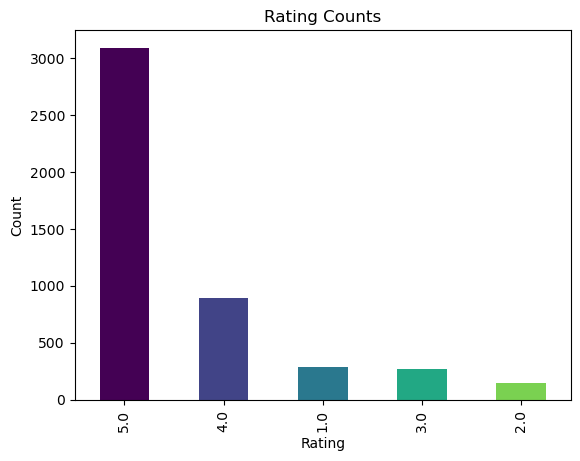

In [111]:
rating_counts = game['rating'].value_counts()

# Create a color map
cmap = plt.get_cmap('viridis')
colors = [cmap(i / len(rating_counts)) for i in range(len(rating_counts))]

# Plot the bar chart
rating_counts.plot(kind='bar', title='Rating Counts', color=colors)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [112]:
# number of reviews for each category
print(game['rating'].value_counts())

rating
5.0    3089
4.0     892
1.0     284
3.0     272
2.0     149
Name: count, dtype: int64


Let's iterate through each star rating to calculate the percentage of reviews that recommend the product for each rating level.

In [113]:
# Lets encode the 'recommended_review' before we proceed, if a product has been recommended, we assign 1, 
# otherwise we assign 0.

game['recommended_review'] = game['recommended_review'].apply(lambda x: 1 if 'yes' in x.lower() else 0)

In [114]:
# Loop through each unique star rating in the 'rating' column
for rating in sorted(game['rating'].unique()):
    # Get the total reviews for the current rating
    total_reviews = game[game['rating'] == rating]['recommended_review'].count()
    
    # Get the number of recommended reviews for the current rating
    recommended_reviews = game[(game['rating'] == rating) & (game['recommended_review'] == 1)].count()['recommended_review']
    
    # Calculate the percentage of reviews that are recommended
    if total_reviews > 0:  # Ensure there is no division by zero
        percentage_recommended = (recommended_reviews / total_reviews) * 100
    else:
        percentage_recommended = 0  # Handle cases with zero total reviews
    
    # Calculate the percentage of reviews that are not recommended
    percentage_not_recommended = 100 - percentage_recommended
    
    # Print the results
    print(f"For {rating}-star reviews:")
    print(f"  Total reviews: {total_reviews}")
    print(f"  Recommended: {recommended_reviews} ({percentage_recommended:.2f}%)")
    print(f"  Not Recommended: {total_reviews - recommended_reviews} ({percentage_not_recommended:.2f}%)")
    print()

For 1.0-star reviews:
  Total reviews: 284
  Recommended: 8 (2.82%)
  Not Recommended: 276 (97.18%)

For 2.0-star reviews:
  Total reviews: 149
  Recommended: 11 (7.38%)
  Not Recommended: 138 (92.62%)

For 3.0-star reviews:
  Total reviews: 272
  Recommended: 95 (34.93%)
  Not Recommended: 177 (65.07%)

For 4.0-star reviews:
  Total reviews: 892
  Recommended: 702 (78.70%)
  Not Recommended: 190 (21.30%)

For 5.0-star reviews:
  Total reviews: 3089
  Recommended: 2405 (77.86%)
  Not Recommended: 684 (22.14%)



Interestingly, a 5-star rating does not guarantee a recommendation, nor does a 1-star rating ensure a product is not recommended. This observation is evident in the visual below.

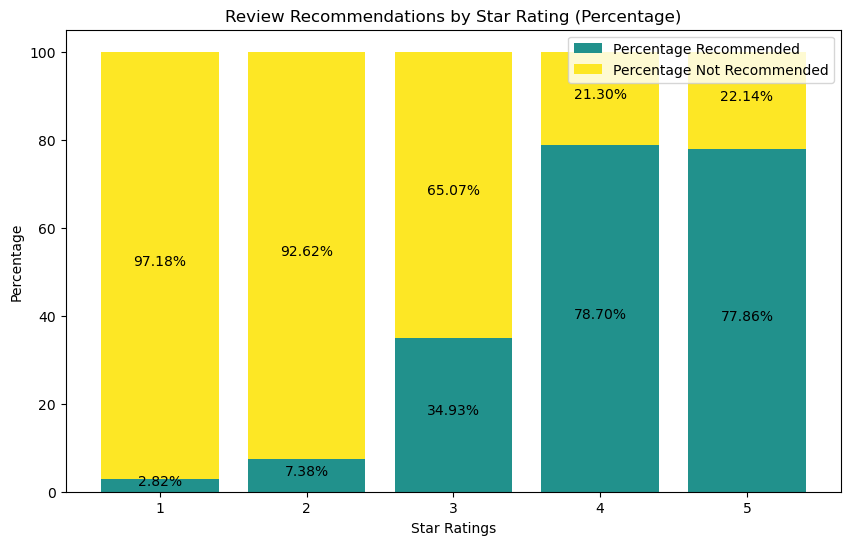

In [130]:
# Prepare the data dynamically
summary_data = {}
for rating in sorted(game['rating'].unique()):
    total_reviews = game[game['rating'] == rating]['recommended_review'].count()
    recommended_reviews = game[(game['rating'] == rating) & (game['recommended_review'] == 1)].count()['recommended_review']
    if total_reviews > 0:  # Prevent division by zero
        percentage_recommended = (recommended_reviews / total_reviews) * 100
        percentage_not_recommended = 100 - percentage_recommended
    else:
        percentage_recommended = 0
        percentage_not_recommended = 0
    
    summary_data[rating] = {
        'percentage_recommended': percentage_recommended,
        'percentage_not_recommended': percentage_not_recommended
    }

# Convert summary data to DataFrame for easier plotting
summary_df = pd.DataFrame.from_dict(summary_data, orient='index')

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
colors = viridis(np.linspace(0.5, 1, 2))

# Plotting percentages
ax.bar(summary_df.index, summary_df['percentage_recommended'], color=to_rgba(colors[0]), label='Percentage Recommended')
ax.bar(summary_df.index, summary_df['percentage_not_recommended'], bottom=summary_df['percentage_recommended'], color=to_rgba(colors[1]), label='Percentage Not Recommended')

# Adding labels on the bars for clarity
for index, row in summary_df.iterrows():
    ax.annotate(f"{row['percentage_recommended']:.2f}%", (index, row['percentage_recommended']/2), ha='center')
    ax.annotate(f"{row['percentage_not_recommended']:.2f}%", (index, 50 + row['percentage_recommended']/2), ha='center')

ax.set_xlabel('Star Ratings')
ax.set_ylabel('Percentage')
ax.set_title('Review Recommendations by Star Rating (Percentage)')
ax.legend()

plt.show()

The trend shows that as the star rating increases, the percentage of recommended reviews also increases, which is expected. However, the non-trivial percentage of non-recommendations even in high star ratings (especially the 5-star category) highlights that star ratings might not fully capture user satisfaction and recommendation likelihood.  

The presence of recommendations even in lower star ratings (1-star and 2-star) can indicate nuanced opinions about products, where users might see some redeeming qualities or specific features that they appreciated despite overall negative experiences.  

The reason why 4-star reviews may recommend the product more than 5-star reviews in our data appears to stem from the disproportional number of reviews between the two categories. We have proportionally more 5-star reviews than 4-star reviews.  

This discrepancy provides an opportunity to consider a hypothetical scenario: if the number of 5-star and 4-star reviews were equal, would we observe the same trend, with 4-star reviews being recommended more frequently, or could this be attributed to randomness?

Is there a specific star rating threshold above which we can confidently predict that a product will be recommended?

In [96]:
#Lets check how many brands are we dealing with?
game['brand'].nunique()

70

So we have 70 unique brands, each has different products. Lets see how many review do we have for each brands?

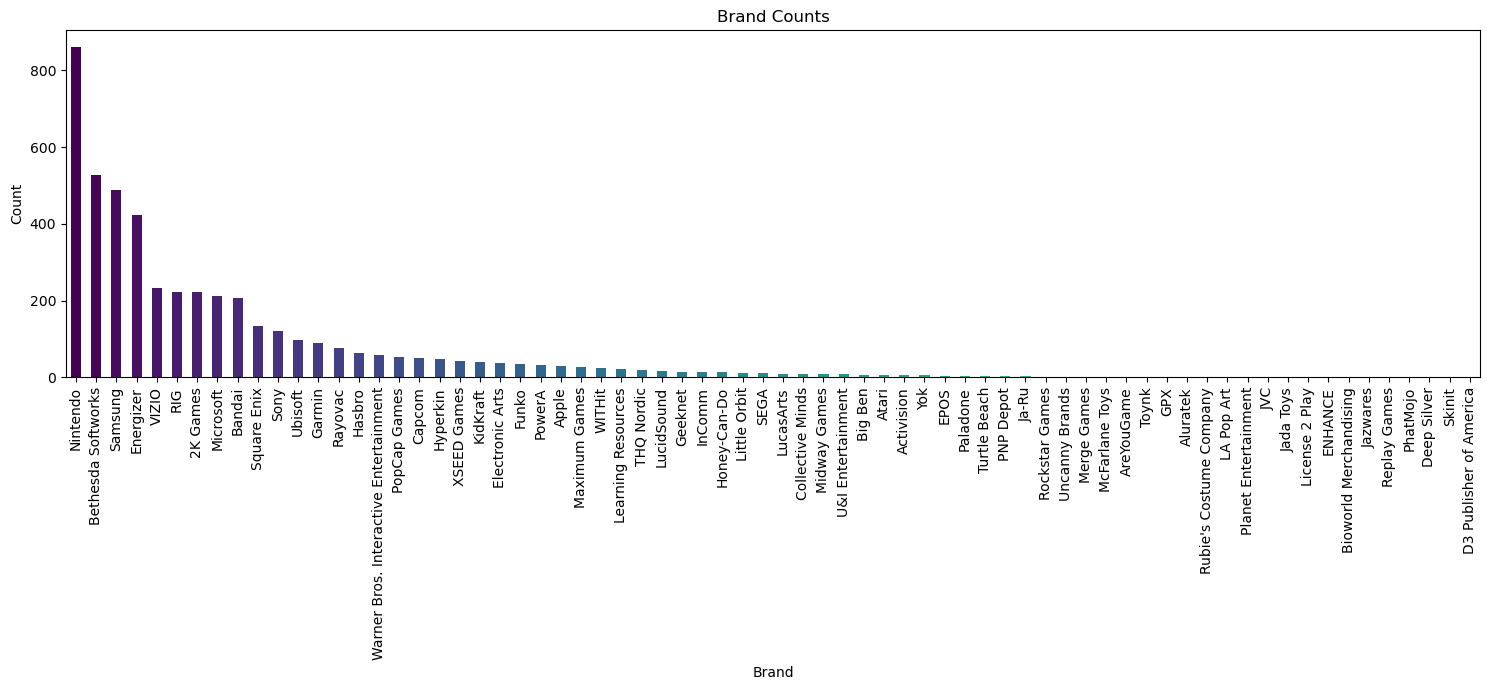

In [88]:
brand_counts = game['brand'].value_counts()

# Create a color map
cmap = plt.get_cmap('viridis')
colors = [cmap(i / len(brand_counts)) for i in range(len(brand_counts))]

# Plot the bar chart
fig, ax = plt.subplots(figsize=(15, 7))
brand_counts.plot(kind='bar', color=colors, title='Brand Counts', ax=ax)
plt.xlabel('Brand')
plt.ylabel('Count')

# Rotate the labels and adjust their font size
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center', fontsize=10)
plt.tight_layout()
plt.show()

Nintendo has the highest number of reviews, significantly outnumbering other brands with over 800 reviews. 
This indicates a strong presence and possibly a higher sales volume or user engagement with Nintendo products on the Gamestop platform.
Brands like Bethesda, Microsoft, and Sony also have substantial numbers of reviews, which could reflect their popularity in the gaming community.
After the initial few brands, there is a long tail of brands with progressively fewer reviews. This pattern is typical in retail and e-commerce, where many smaller brands have limited but specific followings.
Marketing Strategy: The dominance of certain brands could influence Gamestop's marketing strategies, focusing more on these brands could drive more traffic and sales.  

**Inventory Management:** The number of reviews might correlate with sales volume, guiding inventory decisions.  

**Customer Engagement:** High-review brands might be doing something right to engage their users. Insights can be drawn by analyzing the content of the reviews for these brands.  

**Further Analysis Suggestions:**  
As we delve deeper into the data, we gain more insights, uncover potential use cases, and identify strategic solutions. So far, below is 

**Review Sentiment Analysis:** Analyzing the sentiment of the reviews could provide deeper insights into customer satisfaction across brands.  

**Correlation with Sales Data:** If sales data is available, correlating it with the number of reviews could validate assumptions about sales volume and customer engagement. This requires more data from the sales department.

**Time Series Analysis:** Examining how review counts change over time could reveal trends, seasonal variations, and the impact of specific promotions or events.  

